In [1]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import time
import missingno as msno
%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from glob import glob
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report


from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from lightgbm import LGBMClassifier, early_stopping

In [4]:
df_kernel = pd.read_csv('preprocessing/kernel.csv',sep=',')

In [5]:
df_kernel.drop(columns='index', inplace=True)

In [6]:
df = df_kernel.loc[df_kernel.loc[df_kernel.TARGET.isna() == False,'TARGET'].index]

In [7]:
cols = ['EXT_SOURCE_2',
        'PAYMENT_RATE',
        'EXT_SOURCE_3',
        'DAYS_BIRTH',
        'EXT_SOURCE_1',
        'AMT_ANNUITY',
        'APPROVED_CNT_PAYMENT_MEAN',
        'INSTAL_DPD_MEAN',
        'DAYS_ID_PUBLISH',
        'PREV_CNT_PAYMENT_MEAN',
        'INSTAL_AMT_PAYMENT_SUM',
        'ANNUITY_INCOME_PERC', 
        'DAYS_EMPLOYED',
        'AMT_CREDIT',
        'AMT_GOODS_PRICE']  

In [8]:
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0.0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307503,456252,0.0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307504,456253,0.0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307505,456254,1.0,1,0,0,0,171000.0,370107.0,20205.0,319500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def drop_row(df:object,threhold:float):
    
    mask = df.isna().mean() < 0.7
    df = df.loc[:,mask[mask == True].index]
    df.dropna(inplace = True)
    return df

In [10]:
df2 = drop_row(df,0)
df2.isna().mean()

SK_ID_CURR                        0.0
TARGET                            0.0
CODE_GENDER                       0.0
FLAG_OWN_CAR                      0.0
FLAG_OWN_REALTY                   0.0
                                 ... 
INSTAL_AMT_PAYMENT_SUM            0.0
INSTAL_DAYS_ENTRY_PAYMENT_MAX     0.0
INSTAL_DAYS_ENTRY_PAYMENT_MEAN    0.0
INSTAL_DAYS_ENTRY_PAYMENT_SUM     0.0
INSTAL_COUNT                      0.0
Length: 621, dtype: float64

In [11]:
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0.0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307503,456252,0.0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307504,456253,0.0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307505,456254,1.0,1,0,0,0,171000.0,370107.0,20205.0,319500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=797)

In [13]:


colonne = []
for idx,i in enumerate(df.columns):
    colonne.append(i.replace(' ','_').replace(':','_').replace('-','_').replace('/','_').replace(',','_'))
df.columns = colonne

In [14]:
df = df.replace([np.inf, -np.inf], np.nan)
df.fillna(0,inplace=True)

In [15]:
df.isna().mean()

SK_ID_CURR                          0.0
TARGET                              0.0
CODE_GENDER                         0.0
FLAG_OWN_CAR                        0.0
FLAG_OWN_REALTY                     0.0
                                   ... 
CC_NAME_CONTRACT_STATUS_nan_MAX     0.0
CC_NAME_CONTRACT_STATUS_nan_MEAN    0.0
CC_NAME_CONTRACT_STATUS_nan_SUM     0.0
CC_NAME_CONTRACT_STATUS_nan_VAR     0.0
CC_COUNT                            0.0
Length: 797, dtype: float64

In [22]:
y_res[:1000]

223275    0.0
105823    0.0
107992    0.0
237882    0.0
188465    0.0
         ... 
300334    0.0
289017    0.0
223292    0.0
169592    0.0
34579     0.0
Name: TARGET, Length: 1000, dtype: float64

In [27]:
rus = RandomUnderSampler()

X_res, y_res = rus.fit_resample(df.iloc[:,2:], df.TARGET)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

clf = LGBMClassifier(nthread=4,
                     n_estimators=10000,
                     learning_rate=0.02,
                     num_leaves=34,
                     colsample_bytree=0.9497036,
                     subsample=0.8715623,
                     max_depth=8,
                     reg_alpha=0.041545473,
                     reg_lambda=0.0735294,
                     min_split_gain=0.0222415,
                     min_child_weight=39.3259775,
                     silent=-1,
                     verbose=-1)

#scaler = StandardScaler().fit(X_res)

#X_res = scaler.transform(X_res)

#X_test = scaler.transform(X_test)

model_lgbm = clf.fit(X_res, y_res)
#explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model_lgbm,X_res)

In [28]:
shap_values = explainer(df.iloc[:1000,2:],check_additivity=False)

100%|===================| 999/1000 [09:04<00:00]        

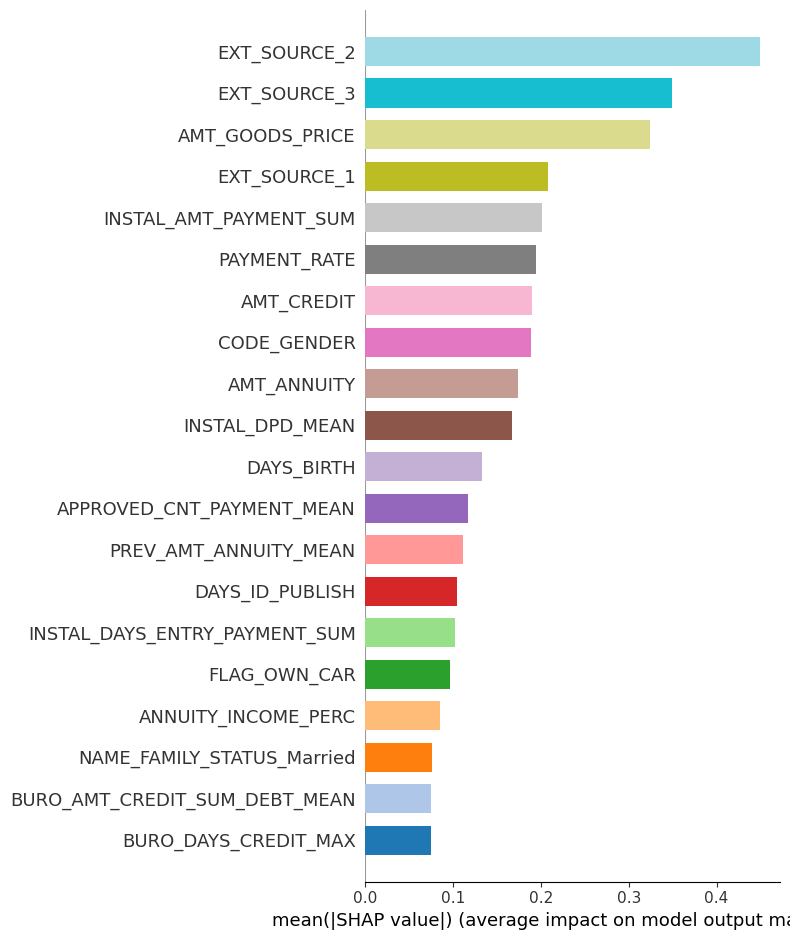

In [29]:
n_colors = 30
color_palette = sns.color_palette("tab20", n_colors=n_colors)
value = shap.summary_plot(shap_values, plot_type='bar', color=color_palette,)

In [17]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
244523,0,0,1,0,112500.0,198666.0,15696.0,175500.0,0.009334,-9258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107719,1,0,0,0,360000.0,1350000.0,74110.5,1350000.0,0.014520,-14550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
262795,1,1,0,1,112500.0,450000.0,38754.0,450000.0,0.025164,-14833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46444,1,0,1,0,112500.0,312768.0,24709.5,270000.0,0.020713,-13617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0
190904,0,1,0,0,180000.0,348264.0,41458.5,315000.0,0.035792,-12439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131328,1,1,1,0,405000.0,1157670.0,109917.0,1125000.0,0.018801,-22651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245541,1,0,0,0,135000.0,401386.5,27283.5,346500.0,0.025164,-8513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163906,1,0,1,1,157500.0,450000.0,21888.0,450000.0,0.010556,-9611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147690,0,0,1,0,157500.0,675000.0,24799.5,675000.0,0.011657,-13534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
len(shap_values[0])

795

In [30]:
mean_abs_shap_values = shap_values.values.sum(axis = 0)

# Trier les variables par ordre d'importance décroissante
sorted_indices = np.argsort(mean_abs_shap_values)

# Obtenir les noms des variables
feature_names = X_res.columns

# Obtenir les noms des variables les plus importantes
top_feature_names = [feature_names[idx] for idx in sorted_indices]

print("Variables les plus importantes :", top_feature_names[:15])

Variables les plus importantes : ['AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'INSTAL_DPD_MEAN', 'INSTAL_AMT_PAYMENT_SUM', 'PAYMENT_RATE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE_Higher_education', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'PREV_AMT_ANNUITY_MEAN', 'POS_SK_DPD_DEF_MEAN', 'REGION_RATING_CLIENT_W_CITY']


In [32]:
top_feature_names[:50]

['AMT_GOODS_PRICE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'INSTAL_DPD_MEAN',
 'INSTAL_AMT_PAYMENT_SUM',
 'PAYMENT_RATE',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE_Higher_education',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'PREV_AMT_ANNUITY_MEAN',
 'POS_SK_DPD_DEF_MEAN',
 'REGION_RATING_CLIENT_W_CITY',
 'POS_NAME_CONTRACT_STATUS_Completed_MEAN',
 'INSTAL_AMT_INSTALMENT_SUM',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'INSTAL_PAYMENT_DIFF_SUM',
 'DAYS_EMPLOYED_PERC',
 'POS_MONTHS_BALANCE_MEAN',
 'PREV_DAYS_DECISION_MAX',
 'ACTIVE_AMT_CREDIT_SUM_MEAN',
 'INSTAL_DAYS_ENTRY_PAYMENT_SUM',
 'CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN',
 'BURO_CREDIT_TYPE_Mortgage_MEAN',
 'BURO_CREDIT_TYPE_Microloan_MEAN',
 'NAME_CONTRACT_TYPE_Cash_loans',
 'CC_AMT_DRAWINGS_POS_CURRENT_SUM',
 'ANNUITY_INCOME_PERC',
 'PREV_NAME_CLIENT_TYPE_New_MEAN',
 'POS_MONTHS_BALANCE_SIZE',
 'PREV_PRODUCT_COMBINATION_Cash_Street__low_MEAN',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'NAME_EDUCA

In [51]:
j = 0
for idx,i in zip(sorted_indices,top_feature_names):
    
    print(idx,':',i ,':',mean_abs_shap_values[idx])
    j+=1

7 : AMT_GOODS_PRICE : -135.9555208610737
31 : EXT_SOURCE_2 : -108.32049839728293
30 : EXT_SOURCE_1 : -73.14054898167724
32 : EXT_SOURCE_3 : -46.88293344029223
630 : INSTAL_DPD_MEAN : -36.3324027356292
649 : INSTAL_AMT_PAYMENT_SUM : -34.676725051483615
244 : PAYMENT_RATE : -33.37579950280927
0 : CODE_GENDER : -31.390845008349793
125 : NAME_EDUCATION_TYPE_Higher_education : -21.813028016659533
77 : DEF_30_CNT_SOCIAL_CIRCLE : -19.421351780577023
10 : DAYS_EMPLOYED : -18.77334737177161
9 : DAYS_BIRTH : -18.39064261764326
363 : PREV_AMT_ANNUITY_MEAN : -18.104192512565344
616 : POS_SK_DPD_DEF_MEAN : -16.323670507865046
22 : REGION_RATING_CLIENT_W_CITY : -15.078493540367326
621 : POS_NAME_CONTRACT_STATUS_Completed_MEAN : -14.153248875340907
645 : INSTAL_AMT_INSTALMENT_SUM : -13.735482396978242
257 : BURO_AMT_CREDIT_SUM_MEAN : -12.602455710944685
641 : INSTAL_PAYMENT_DIFF_SUM : -12.528608671482912
240 : DAYS_EMPLOYED_PERC : -12.43111301866925
611 : POS_MONTHS_BALANCE_MEAN : -11.669671116907034

In [47]:
X_train[:2000]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
244523,0,0,1,0,112500.0,198666.0,15696.0,175500.0,0.009334,-9258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139513,0,0,0,0,315000.0,225000.0,7195.5,225000.0,0.010032,-16827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
275867,0,1,0,1,135000.0,343800.0,16722.0,225000.0,0.009630,-11813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203849,1,0,0,0,225000.0,755190.0,36328.5,675000.0,0.030755,-16519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190904,0,1,0,0,180000.0,348264.0,41458.5,315000.0,0.035792,-12439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26037,0,1,1,2,180000.0,522000.0,20358.0,522000.0,0.030755,-14617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261258,1,0,0,0,112500.0,539230.5,23881.5,409500.0,0.035792,-22795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236862,0,1,0,1,382500.0,1260000.0,39564.0,1260000.0,0.026392,-17394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
32494,0,1,0,1,180000.0,270000.0,13500.0,270000.0,0.028663,-14109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


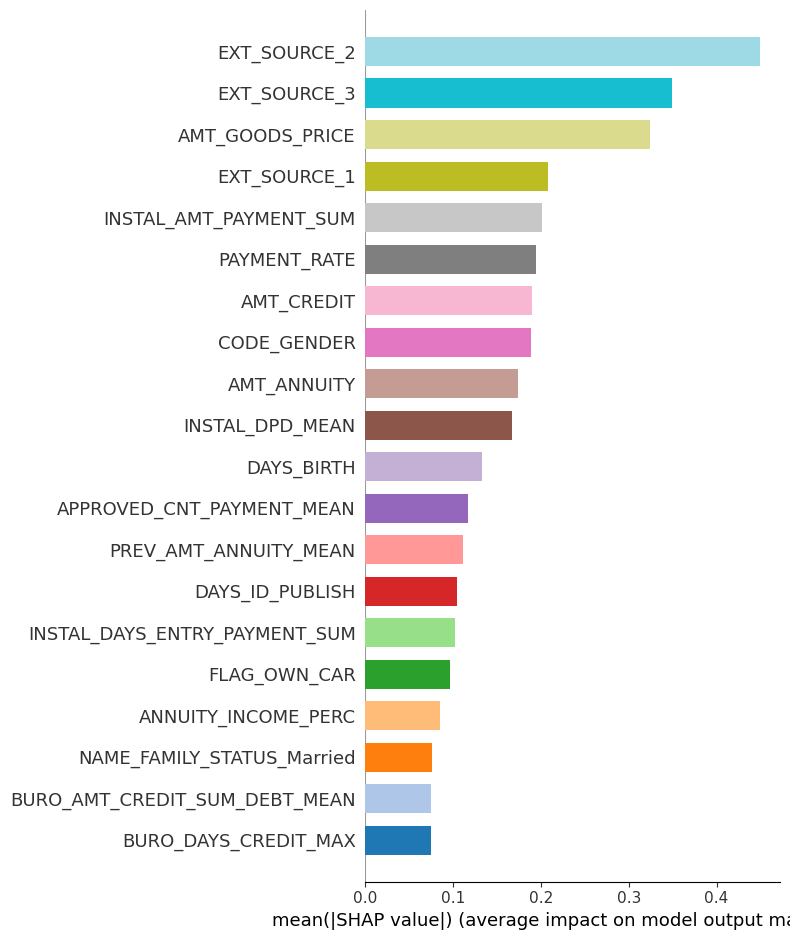

In [46]:
n_colors = 30
color_palette = sns.color_palette("tab20", n_colors=n_colors)
value = shap.summary_plot(shap_values, plot_type='bar', color=color_palette,)

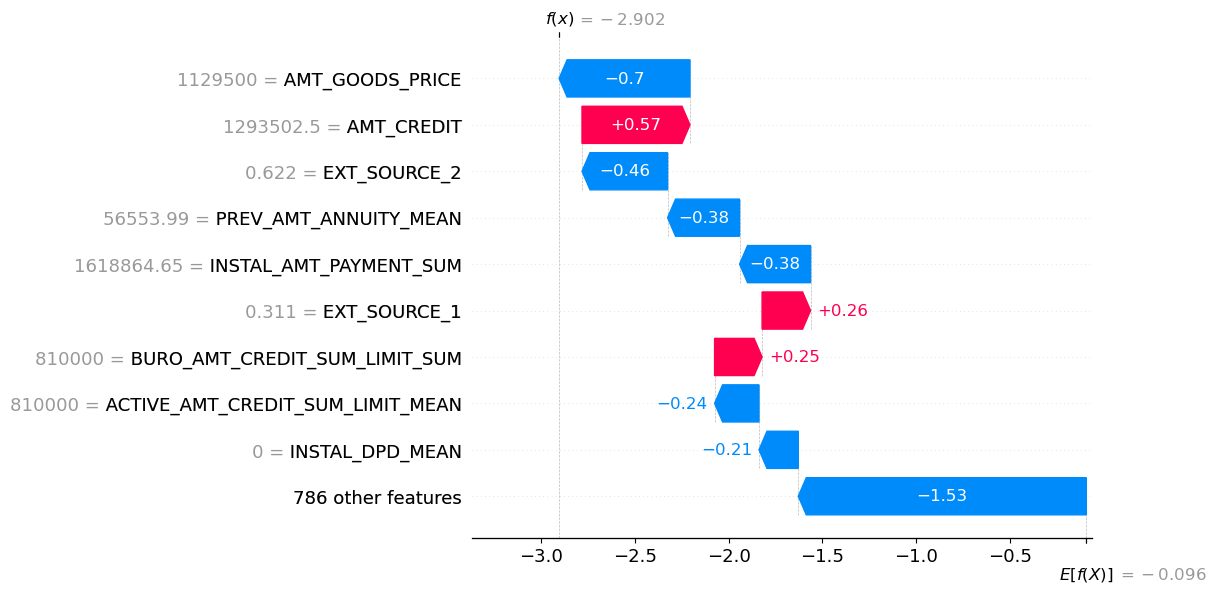

In [82]:
shap.plots.waterfall(shap_values[1],show=True)

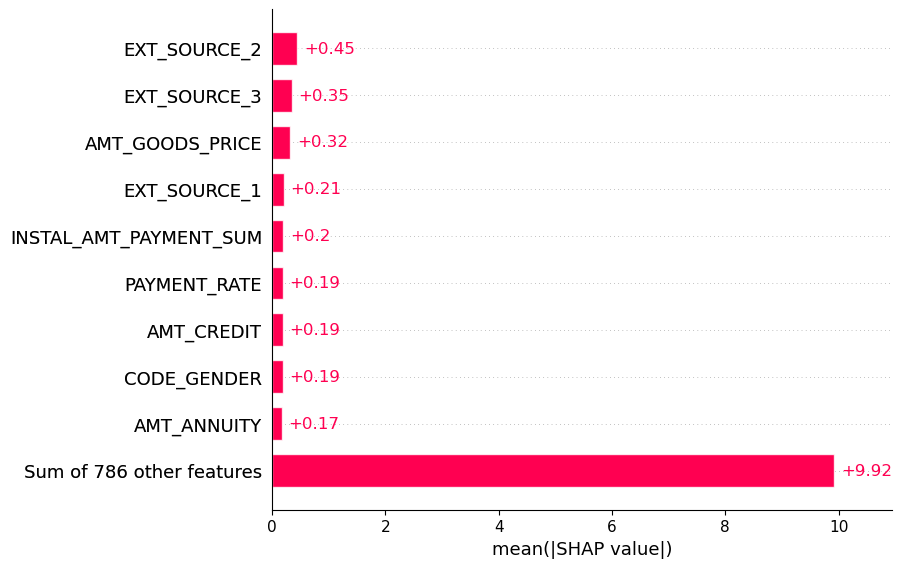

In [44]:
shap.plots.bar(shap_values)

In [75]:
shap_values.values[0:1000][:40]

array([[ 0.18037727,  0.05126889,  0.02293703, ...,  0.        ,
         0.        ,  0.00195683],
       [-0.1627624 ,  0.05765287, -0.04858986, ...,  0.        ,
         0.        ,  0.00156331],
       [ 0.31021869, -0.2494929 ,  0.02539733, ...,  0.        ,
         0.        ,  0.00227215],
       ...,
       [ 0.28772421,  0.08433592,  0.02104236, ...,  0.        ,
         0.        ,  0.00063738],
       [-0.24282207,  0.04327414,  0.01271638, ...,  0.        ,
         0.        ,  0.00141506],
       [ 0.12258699, -0.14769596,  0.0109408 , ...,  0.        ,
         0.        ,  0.00099186]])

In [81]:
shap_values.values[1][:15]

array([-1.62762401e-01,  5.76528721e-02, -4.85898585e-02, -5.40283490e-05,
       -2.45486893e-02,  5.74621817e-01,  1.61187117e-01, -6.96456072e-01,
       -1.33866294e-01,  1.69551819e-02,  3.95056313e-02, -1.11469415e-01,
        1.75781686e-01,  3.95782122e-02,  0.00000000e+00])

In [55]:
pd.DataFrame(shap_values.values)

,0,1,2,3,4,5,6,7,8,9,...,785,786,787,788,789,790,791,792,793,794
0,0.180377,0.051269,0.022937,-0.003010,0.038734,-0.097542,0.030292,0.226995,0.020851,-0.269969,...,0.0,-0.000095,0.0,0.000374,0.0,0.0,0.0,0.0,0.0,0.001957
1,-0.162762,0.057653,-0.048590,-0.000054,-0.024549,0.574622,0.161187,-0.696456,-0.133866,0.016955,...,0.0,-0.000100,0.0,0.000330,0.0,0.0,0.0,0.0,0.0,0.001563
2,0.310219,-0.249493,0.025397,-0.002691,-0.000969,-0.303639,-0.352502,0.193379,-0.013280,-0.253934,...,0.0,-0.000088,0.0,0.000282,0.0,0.0,0.0,0.0,0.0,0.002272
3,-0.156766,0.079094,0.010443,-0.001957,0.026357,-0.153923,0.095697,0.220433,-0.126856,-0.066575,...,0.0,-0.000083,0.0,0.000303,0.0,0.0,0.0,0.0,0.0,-0.000299
4,0.252413,0.069282,0.024964,-0.000889,-0.050353,-0.052975,-0.003440,-0.276156,0.155277,-0.053310,...,0.0,-0.000080,0.0,0.000430,0.0,0.0,0.0,0.0,0.0,-0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.245722,0.046028,-0.042941,-0.000659,-0.045626,0.026366,-0.104620,0.141322,-0.139725,-0.274805,...,0.0,-0.000082,0.0,0.000398,0.0,0.0,0.0,0.0,0.0,-0.006690
996,-0.177866,0.101963,0.014514,-0.001070,0.038537,0.522049,0.336326,-0.440140,-0.189602,0.162450,...,0.0,-0.000075,0.0,0.000210,0.0,0.0,0.0,0.0,0.0,0.001039
997,-0.151955,-0.124283,0.011214,-0.003115,0.029167,0.034536,0.036587,0.174218,-0.096033,-0.174028,...,0.0,-0.000082,0.0,0.000508,0.0,0.0,0.0,0.0,0.0,0.001865
998,0.187371,0.136906,0.005438,-0.000022,0.004949,0.597139,0.288695,-0.707992,0.048750,0.026049,...,0.0,-0.000092,0.0,0.000347,0.0,0.0,0.0,0.0,0.0,0.001165


In [20]:
model = Pipeline([
                      ('random_under_sampler',RandomUnderSampler(random_state=42)),
                      ('scaler', StandardScaler()),
                      ('random_forest', LGBMClassifier(
                                                        nthread=4,
                                                        n_estimators=10000,
                                                        learning_rate=0.02,
                                                        num_leaves=34,
                                                        colsample_bytree=0.9497036,
                                                        subsample=0.8715623,
                                                        max_depth=8,
                                                        reg_alpha=0.041545473,
                                                        reg_lambda=0.0735294,
                                                        min_split_gain=0.0222415,
                                                        min_child_weight=39.3259775,
                                                        silent=-1,
                                                        verbose=-1, )),])
    
    
    
df.fillna(0, inplace = True)
    
X = df.loc[:,top_feature_names[:15]]
    
y = df.TARGET
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
    
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.60      0.73     56481
         1.0       0.11      0.58      0.19      5021

    accuracy                           0.60     61502
   macro avg       0.53      0.59      0.46     61502
weighted avg       0.87      0.60      0.69     61502



In [138]:
rus = RandomUnderSampler()

X, y = X_res.loc[:,top_feature_names[:15]], y_res


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = LGBMClassifier(nthread=4,
                     n_estimators=10000,
                     learning_rate=0.02,
                     num_leaves=34,
                     colsample_bytree=0.9497036,
                     subsample=0.8715623,
                     max_depth=8,
                     reg_alpha=0.041545473,
                     reg_lambda=0.0735294,
                     min_split_gain=0.0222415,
                     min_child_weight=39.3259775,
                     silent=-1,
                     verbose=-1)

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
    
#y_proba = clf.predict_proba(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.62      0.62      4953
         1.0       0.62      0.61      0.61      4977

    accuracy                           0.61      9930
   macro avg       0.61      0.61      0.61      9930
weighted avg       0.61      0.61      0.61      9930



In [22]:
import pickle

In [23]:
name_model = 'model_lightgbm_explainer.pkl'
with open(name_model,'wb') as f:
    lgbm_model = pickle.dump(explainer,f)


In [38]:
name_model = 'model_lightgbm_explainer.pkl'
with open(name_model,'rb') as f:
    lgbm_model = pickle.load(f)
    
lgbm_model(X_train[:100],check_additivity=False)

NameError: name 'pickle' is not defined

In [48]:
import pickle
name_model = 'model_lightgbm_shap.pkl'
with open(name_model,'wb') as f:
    rdf_model = pickle.dump(shap_values,f)


In [49]:
name_model = 'model_lightgbm_shap.pkl'

with open(name_model,'rb') as f:
    gbm_model_shap = pickle.load(f)


In [50]:
gbm_model_shap.values[0][sorted_indices[1]]

0.33381497410618977

In [ ]:
name_model = 'model_lightgbm.pkl'
with open(name_model,'wb') as f:
    rdf_model = pickle.dump(model_lgbm,f)
with open(name_model,'rb') as f:
    rdf_model = pickle.load(f)